# **Automatidata project**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

#  Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

## Plan 

In this stage, consider the following questions where applicable to complete your code response:


**Exemplar response:**

1. Identify any outliers:


*   What methods are best for identifying outliers?
  * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
  * Use a boxplot to visualize the distribution of the data
  * Use histograms to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?
  * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:

      * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
      * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
      * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [40]:
# Load data

file_path = r"C:\Users\userr\OneDrive\Documents\Python Project with Jupyter\_2017_Yellow_Taxi_Trip_Data.csv"

df = pd.read_csv(file_path)
print("✅ File loaded successfully!")

✅ File loaded successfully!


### Task 2a. Data exploration and cleaning
​
Decide which columns are applicable
​
The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. Then answer these questions to yourself: 
​
Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 
​
Consider functions that help you understand and structure the data. 
*    `head()`
*    `describe()`
*    `info()`
*    `groupby()`
*    `sortby()`
​
Consider these questions as you work: 
​
What do you do about missing data (if any)? 
​
Are there data outliers?  
​
What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?
​

Start by discovering, using head and size.

In [42]:
# Display the first few rows

df.head()

Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1    35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2   106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3    38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4    30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  
0        2.76           0.0                    0.3         16.56  
1        4.00           0.0                    0.3         20.80  
2        1.45           0.0                    0.3          8.75  
3        6.39           0.0                    0.3         27.69  
4        0.00           0.0                    0.3         17.80

In [44]:
df.size

408582

Use describe... 

In [9]:
df.describe()  # Get data types and basic statistics

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000   -120.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   
50%        1.000000    162.000000    162.000000      1.000000      9.500000   
75%        1.000000    233.000000    233.000000      2.000000     14.500000   
max       99.000000    265.000000    265.000000      4.000000    999.990000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000   
mean       0.333275      0.497445      1.835781      0.312542   
std        0.463097      0.039465      2.800626      1.399212   
min       -1.000000     -0.500000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.000000   
50%        0.000000      0.500000      1.350000      0.000000   
75%        0.500000      0.500000      2.450000      0.000000   
max        4.500000      0.500000    200.000000     19.100000   

       improvement_surcharge  total_amount  
count           22699.000000  22699.000000  
mean                0.299551     16.310502  
std                 0.015673     16.097295  
min                -0.300000   -120.300000  
25%                 0.300000      8.750000  
50%                 0.300000     11.800000  
75%                 0.300000     17.800000  
max                 0.300000   1200.290000

In [46]:
# Check the missing values

df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [48]:
# Check the duplicate values

df.duplicated().sum()

0

And info.

In [50]:
df.info()  #There is no missing data and data types are the same in Tableau.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is no missing data according to the results from the info() function.

In [52]:
# Convert data columns to datetime

df['tpep_pickup_datetime'] = pd.to_datetime (df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime (df['tpep_dropoff_datetime'])

print (df['tpep_pickup_datetime'].dtype)
print (df['tpep_dropoff_datetime'].dtype)

datetime64[ns]
datetime64[ns]


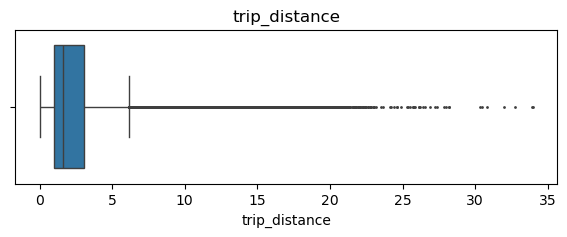

In [15]:
# Create box plot of trip_distance

plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

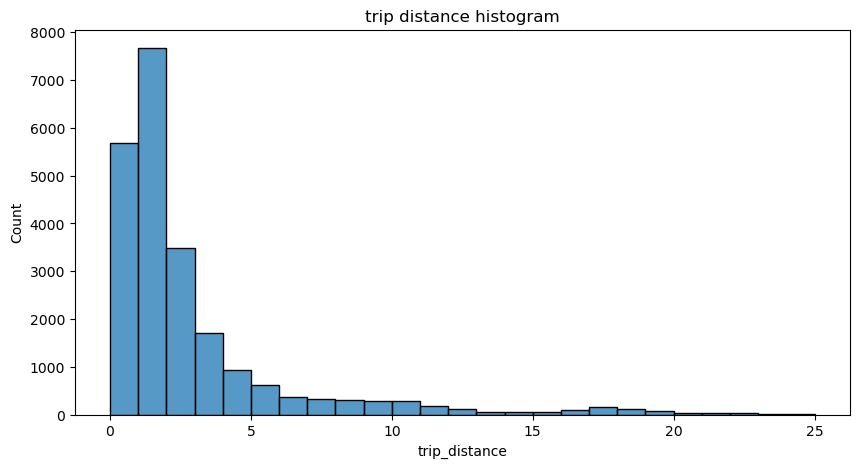

In [17]:
# Create histogram of trip_distance

plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('trip distance histogram');

In [19]:
# There are outliers
# If the distance traveled increase the number of trips falls
# Less than 2 miles for the mayority of journeys

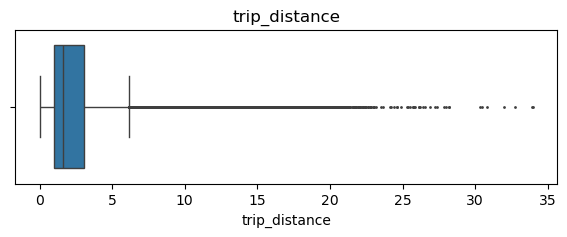

In [21]:
# Box plot of trip_distance

plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

In [23]:
# between 0 and ~5 miles, confirming that most trips are short.
# If distance increase yo can see less number of trips

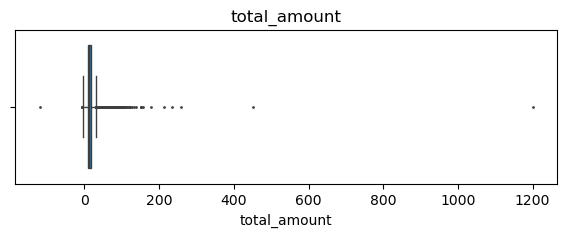

In [25]:
# Boxplot of total_amount

plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

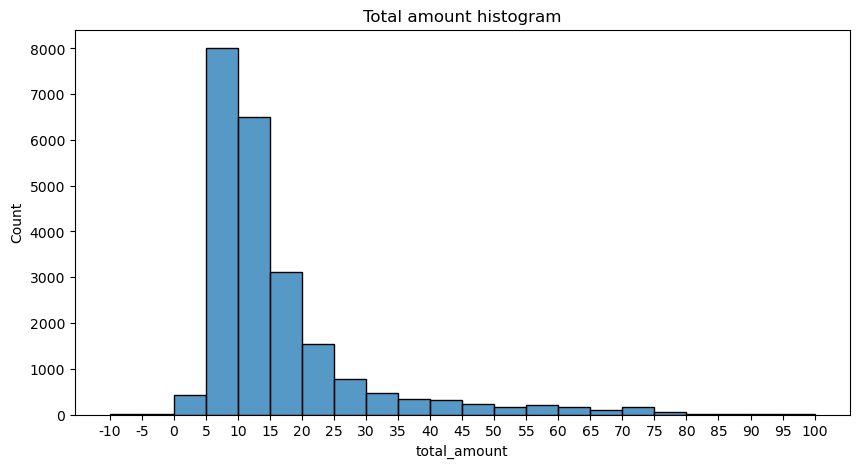

In [27]:
# Histogram of total_amount

plt.figure(figsize=(10,5))
sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax = plt.gca()
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

In [29]:
# Most cost between $5 - $15
# Also it has distribution that skews right

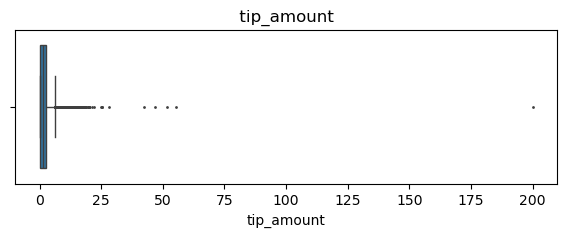

In [31]:
# Box plot of tip_amount

plt.figure(figsize=(7,2))
plt.title(' tip_amount ')
sns.boxplot(x=df['tip_amount'], fliersize=1);

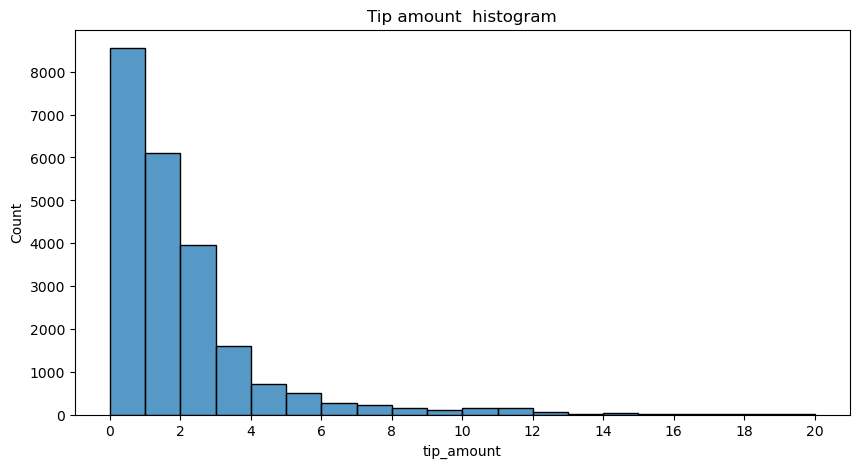

In [33]:
# Histogram of tip_amount

plt.figure(figsize=(10,5))
sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax = plt.gca()
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount  histogram');

In [35]:
# $0 - $3 most customers give small tips.
# Also distribution for tip amount skews right

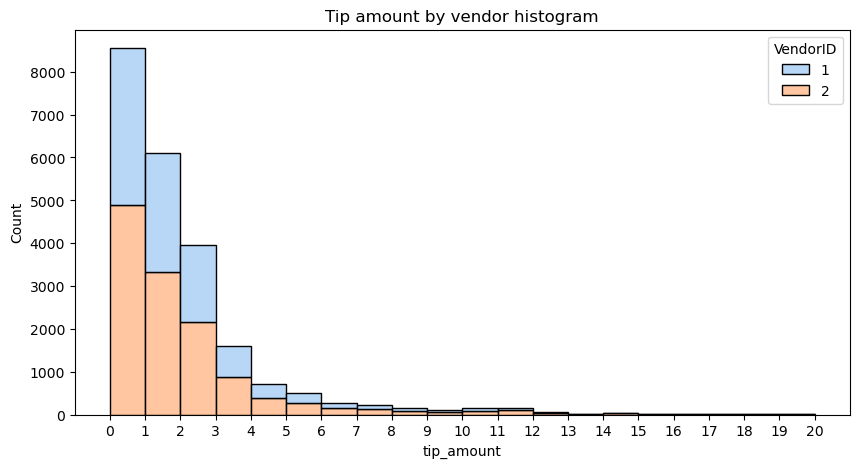

In [37]:
# Histogram of tip_amount by vendor

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tip_amount', bins=range(0,21,1),
            hue = 'VendorID',
            multiple = 'stack',
            palette = 'pastel')
ax = plt.gca()
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

In [39]:
# Both vendors follow a similar pattern and no a big difference about tips.
# Vendor 1 has more trips overall, but Vendor 2 also has a significant share.
#Very few tips exceed $10.

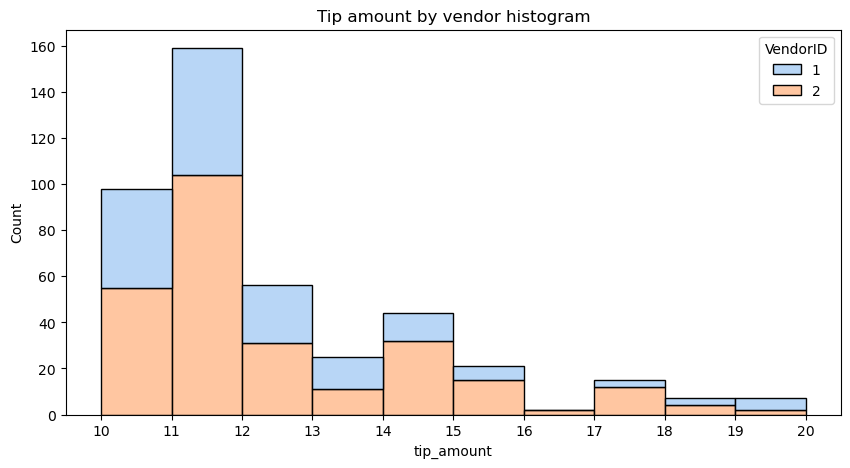

In [41]:
# Histogram of tip_amount by vendor for tips > $10

tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(10,5))
sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1),
            hue = 'VendorID',
            multiple = 'stack',
            palette = 'pastel')
ax = plt.gca()
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

In [43]:
# Both vendors have nearly equal contributions to high tips, meaning no vendor dominates higher tipping customers.

In [45]:
# Checing unique values in the passenger_count column

df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [47]:
# The majority of trips (16,117) have 1 passenger, meaning single-passenger rides dominate.
# Only 3,305 trips had 2 passengers, much lower than solo rides.
# Passenger counts 3, 4, 5, and 6 have even fewer trips, indicating group rides are less common.
# There are 33 trips with 0 passengers.

In [49]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [51]:
# Calculate mean tips by passenger_count

mean_tips_by_passenger_count = df.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

tip_amount
passenger_count            
0                  2.135758
1                  1.848920
2                  1.856378
3                  1.716768
4                  1.530264
5                  1.873185
6                  1.720260

C:\Users\userr\AppData\Local\Temp\ipykernel_10560\4051380326.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
C:\Users\userr\AppData\Local\Temp\ipykernel_10560\4051380326.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


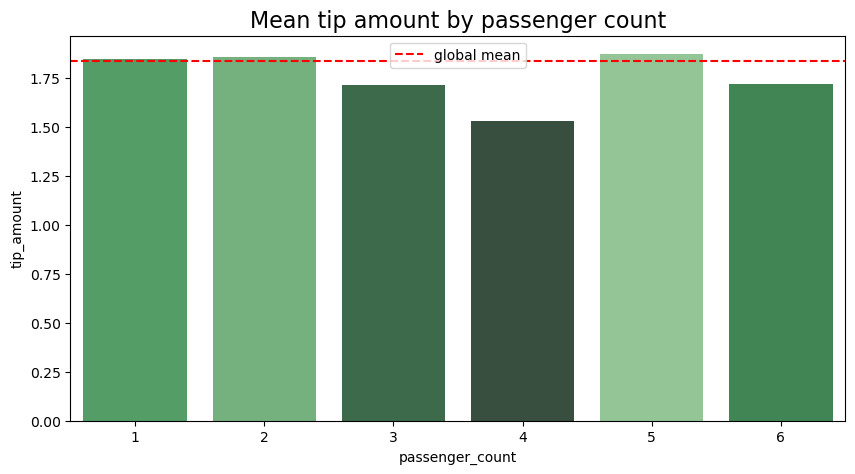

In [59]:
# Create bar plot for mean tips by passenger count

data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(10,5))
ax = sns.barplot(x=data.index,
                 y=data['tip_amount'],
                 palette=np.array(pal[::-1])[rank])
ax = plt.gca()
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

In [14]:
df['tpep_pickup_datetime']

0       2017-03-25 08:55:43
1       2017-04-11 14:53:28
2       2017-12-15 07:26:56
3       2017-05-07 13:17:59
4       2017-04-15 23:32:20
                ...        
22694   2017-02-24 17:37:23
22695   2017-08-06 16:43:59
22696   2017-09-04 14:54:14
22697   2017-07-15 12:56:30
22698   2017-03-02 13:02:49
Name: tpep_pickup_datetime, Length: 22699, dtype: datetime64[ns]

In [54]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [56]:
# Get total number of rides for each month

monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [58]:
# Reorder the monthly ride list so months go in order

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [60]:
# Show the index

monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

C:\Users\userr\AppData\Local\Temp\ipykernel_14324\3152323737.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, palette = "husl")
C:\Users\userr\AppData\Local\Temp\ipykernel_14324\3152323737.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


Text(0.5, 1.0, 'Ride count by month')

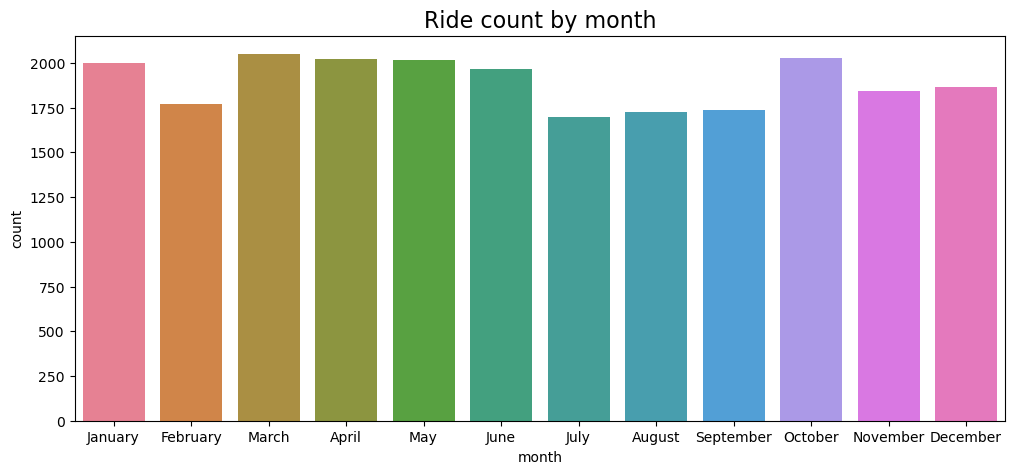

In [62]:
# Create a bar plot of total rides per month

plt.figure(figsize=(12,5))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, palette = "husl")
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize = 16)       

In [73]:
# Ride counts fluctuate across months, indicating possible seasonal demand.
# There are noticeable dips in February and July, which might be due to fewer travel activities during these months.

In [64]:
# Rides by day

daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\userr\AppData\Local\Temp\ipykernel_14324\1018327569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = daily_rides.index, y = daily_rides, palette = "husl")
C:\Users\userr\AppData\Local\Temp\ipykernel_14324\1018327569.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'Ride count by month')

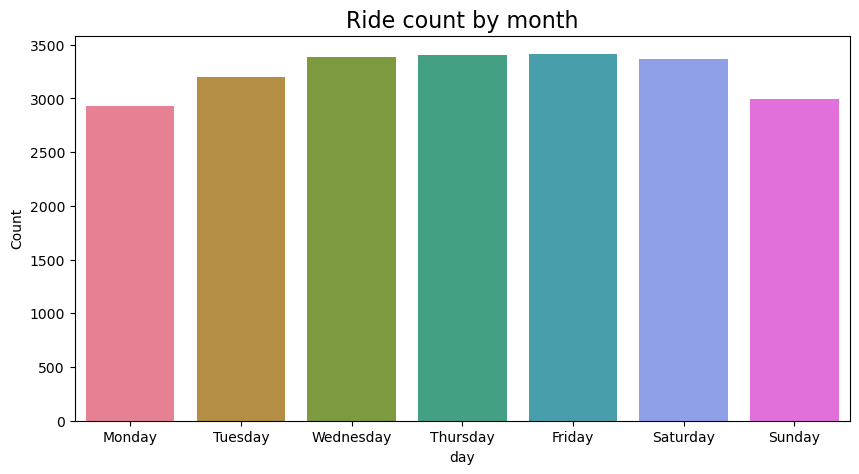

In [66]:
# Create bar plot for ride count by day

plt.figure(figsize=(10,5))
ax = sns.barplot(x = daily_rides.index, y = daily_rides, palette = "husl")
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by month', fontsize = 16) 

In [79]:
# Monday, Tuesday and Sunday are dips about rides.
# Monday and Tuesday might have lower rides as people settle into the workweek and Sunday possibly due to people resting.
# Wednesday to Friday show the highest ride counts this could indicate a high volume of work-related or routine trips.

In [68]:
# This time for total revenue by day

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

total_amount
day                    
Monday         49574.37
Tuesday        52527.14
Wednesday      55310.47
Thursday       57181.91
Friday         55818.74
Saturday       51195.40
Sunday         48624.06

C:\Users\userr\AppData\Local\Temp\ipykernel_14324\659125578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'], palette = "husl")
C:\Users\userr\AppData\Local\Temp\ipykernel_14324\659125578.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


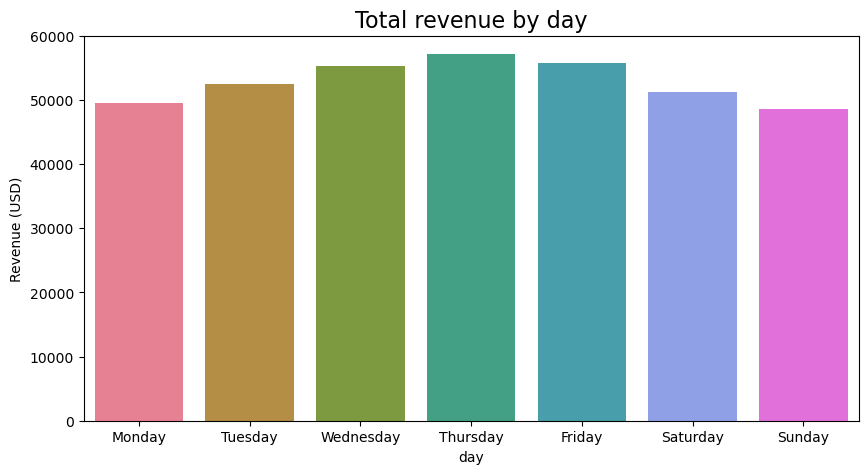

In [70]:
# Create bar plot of total revenue by day

plt.figure(figsize=(10,5))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'], palette = "husl")
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

In [87]:
# Revenue increases from Monday to Thursday and then gradually decreases from Friday to Sunday.

In [72]:
# Total revenue by month

total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

total_amount
month                  
January        31735.25
February       28937.89
March          33085.89
April          32012.54
May            33828.58
June           32920.52
July           26617.64
August         27759.56
September      28206.38
October        33065.83
November       30800.44
December       31261.57

C:\Users\userr\AppData\Local\Temp\ipykernel_10560\677838244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], palette = "husl")


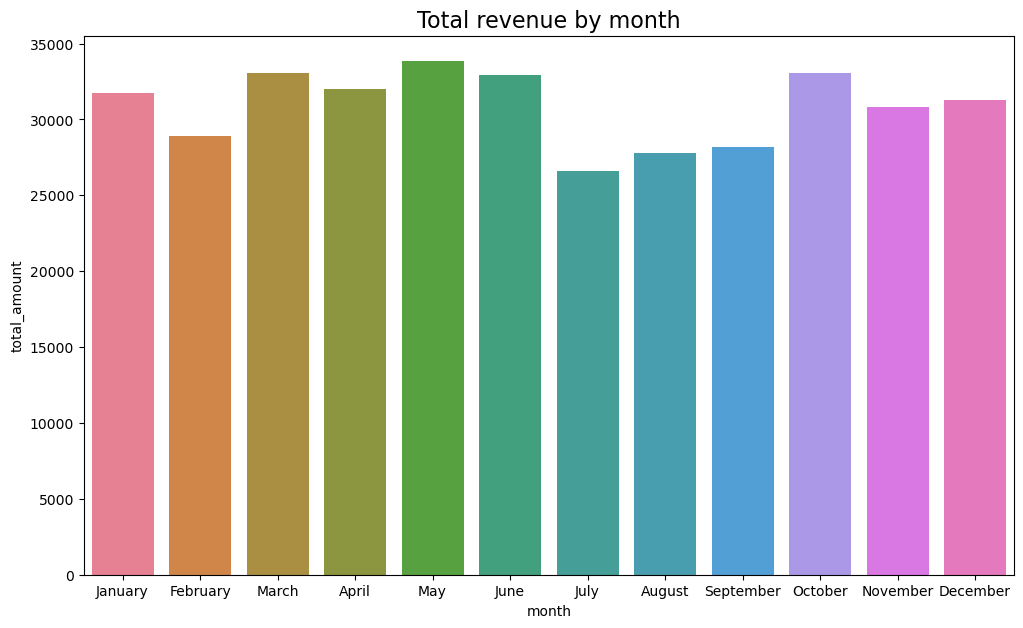

In [93]:
# Create a bar plot of total revenue by month

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], palette = "husl")
plt.title('Total revenue by month', fontsize=16);

In [95]:
# Similar pattern than monthly rides.
# In February, July, August and September months there are dips about total revenue.

In [74]:
# Get number of unique drop-off location IDs

df['DOLocationID'].nunique() 

216

In [76]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby(['DOLocationID'])[['trip_distance']].mean()

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

trip_distance
DOLocationID               
207                1.200000
193                1.390556
237                1.555494
234                1.727806
137                1.818852
...                     ...
51                17.310000
11                17.945000
210               20.500000
29                21.650000
23                24.275000

[216 rows x 1 columns]

C:\Users\userr\AppData\Local\Temp\ipykernel_5360\2495376100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distance_by_dropoff.index,


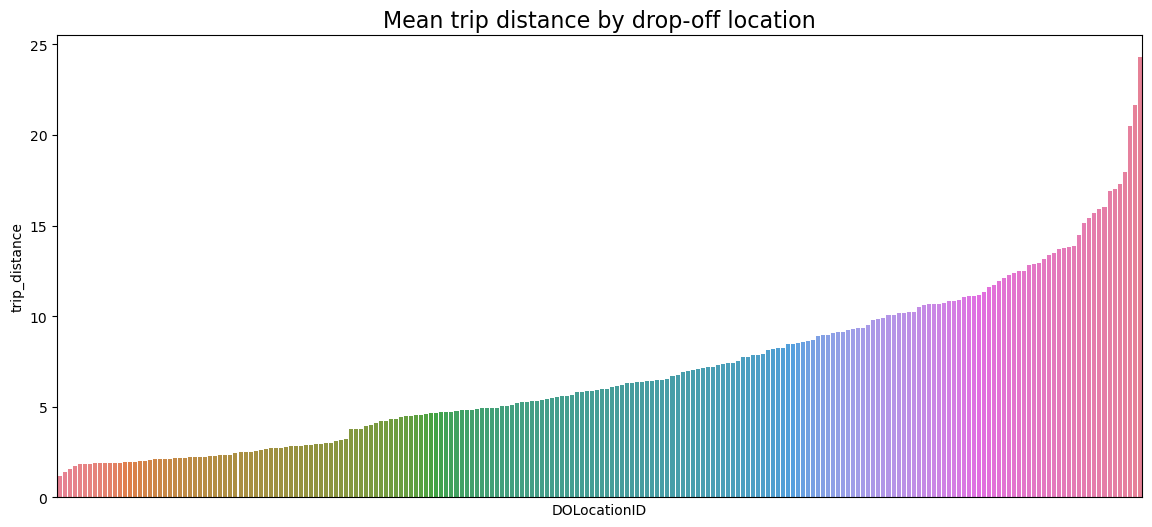

In [21]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance

plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index palette = "husl")
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

In [23]:
# Certain drop-off locations have significantly longer average trip distances than others.
# The graph shows a relatively smooth increase, but there are significant spikes on the right end (outliers).

In [31]:
# Check if all drop-off locations are consecutively numbered

df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

In [33]:
# 49 numbers do not represent a drop-off locations.
# Sorting the unique drop-off locations values and converting them to string could eliminate the spaces that missing number creates.

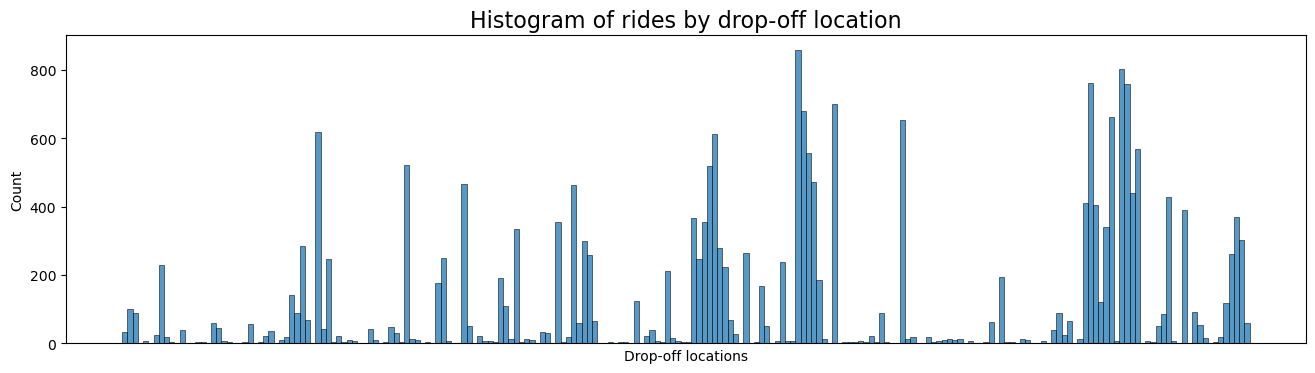

In [35]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

In [37]:
# A few drop-off locations have significantly higher counts, meaning these places are major hotspots for passengers.
# Instead of a smooth distribution, some locations dominate while others are barely used.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [78]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

print(df['tpep_dropoff_datetime'].dtype)
print(df['tpep_pickup_datetime'].dtype)

datetime64[ns]
datetime64[ns]


In [80]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

df.head(5)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0           100           231  ...         13.0    0.0      0.5        2.76   
1           186            43  ...         16.0    0.0      0.5        4.00   
2           262           236  ...          6.5    0.0      0.5        1.45   
3           188            97  ...         20.5    0.0      0.5        6.39   
4             4           112  ...         16.5    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount     month       day  \
0           0.0                    0.3         16.56     March  Saturday   
1           0.0                    0.3         20.80     April   Tuesday   
2           0.0                    0.3          8.75  December    Friday   
3           0.0                    0.3         27.69       May    Sunday   
4           0.0                    0.3         17.80     April  Saturday   

    trip_duration  
0 0 days 00:14:04  
1 0 days 00:26:30  
2 0 days 00:07:12  
3 0 days 00:30:15  
4 0 days 00:16:43  

[5 rows x 21 columns]